In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
def duras(Lx):
    a, b, c  = (15.33, 11.48, 16.20)
    Lsun = 3.832*1e33
    Lnorm = (10**Lx)/Lsun
    K = a*(1+(np.log10(Lnorm)/b)**c)
    return np.log10(10**Lx*K)

def lamastra(Lx):
    L_oiii = (Lx-42-1.11)
    L_oiii = (L_oiii/1.02) +42
    return L_oiii

def lamastra_inversa(L_oiii):
    Lx =(L_oiii-42)*1.02
    Lx = (Lx + 1.11) +42
    return Lx

def marconi_inversa(Lbol):
    Lsun = 3.832*1e33
    Lnorm = Lbol-np.log10(Lsun)
    L = Lnorm-12
    K = 1.54 +0.24*L +0.012*L*L-0.0015*(L**3)
    K = 10**K 
    Lx = np.log10(10**Lnorm/K)
    return Lx+np.log10(Lsun)

def marconi(Lx):
    Lbol_array = np.arange(40,48,0.1)
    Lx_fake = [marconi_inversa(i) for i in Lbol_array]
    Lbol = np.interp(Lx, Lx_fake, Lbol_array)
    return Lbol





In [68]:
Lx = np.arange(39, 47, 0.1)
lbol_duras = [duras(i) for i in Lx]
lbol_marconi = [marconi(i) for i in Lx]

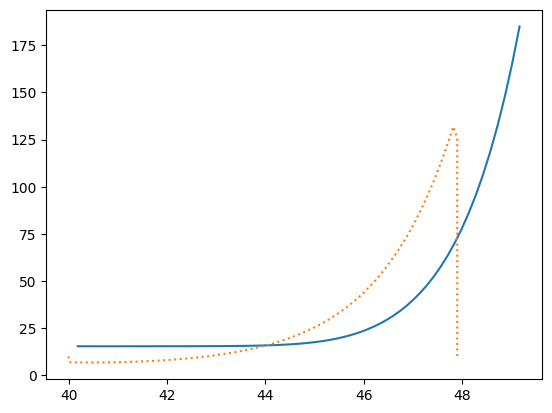

In [69]:
fig, ax = plt.subplots()
ax.plot(lbol_duras, 10**(lbol_duras-Lx))
ax.plot(lbol_marconi, 10**(lbol_marconi-Lx), ls ='dotted')

In [83]:
Loiii = 43
Lx = lamastra_inversa(Loiii)
print(Lx)
lbol = marconi(Lx)
print(lbol)
print(10**(lbol-Loiii))

44.13
45.69754567846747
498.3628703022422


In [77]:
lx = [lamastra_inversa(i) for i in np.arange(43, 43.6, 0.2)]

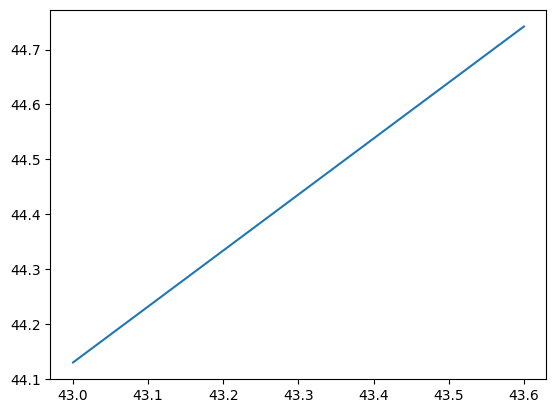

In [78]:
fig, ax = plt.subplots()
ax.plot(np.arange(43, 43.6, 0.2), lx)

In [84]:
def Lx_2_Loiii(Lx):
    #log(Lx) = 1.11 +1.02log(L_oiii)
    # both L in units of 1e42 erg/s  Lamastra+09
    L_oiii = np.log10(Lx/1e42)-1.11
    L_oiii = L_oiii/1.02
    return L_oiii

In [121]:
def get_reduced_table(directory = "qsogen_4_catalog/narrow_lines", master_fname = "A_Feltre_master.dat",
                      logU_list = [-1.5,  -2.0, -2.5, -3.0, -3.5, -4.0],  
                      alpha_list = [-1.4,  -1.7],
                      met_list = [0.008, 0.014, 0.017, 0.020, 0.030, 0.040],
                      nh_list = [3],
                      xi_list = [0.3], 
                      normalize = "OIII_4959"):
    lines = pd.read_csv(os.path.join(directory, master_fname), delim_whitespace = True)
    u_cond = np.isin(lines["logU"], logU_list)
    met_cond = np.isin(lines["Z"], met_list)
    al_cond = np.isin(lines["al"], alpha_list)
    nh_cond = np.isin(lines["lnh"], nh_list)
    xi_cond = np.isin(lines["xi"], xi_list)

    if normalize is not None:
        lines.iloc[:, 5:] = lines.iloc[:, 5:]-lines[normalize].to_numpy()[:, None]
    
    return lines[np.logical_and.reduce([u_cond, met_cond, al_cond, nh_cond, xi_cond])]

In [122]:
import os

In [123]:
x = get_reduced_table()

In [126]:
x["OIII_4959"]

269     0.0
270     0.0
305     0.0
306     0.0
341     0.0
       ... 
3834    0.0
3869    0.0
3870    0.0
3905    0.0
3906    0.0
Name: OIII_4959, Length: 72, dtype: float64

In [96]:
x.iloc[:, 5:]-x["OIII_4959"].to_numpy()

ValueError: Unable to coerce to Series, length must be 27: given 72

In [104]:
y = x["OIII_4959"].to_numpy()

In [100]:
len(x.iloc[:, 5:])

72

In [105]:
x.iloc[:, 5:]-y

ValueError: Unable to coerce to Series, length must be 27: given 72

In [116]:
c= np.repeat(np.atleast_1d(y), 27, axis = 1)


AxisError: axis 1 is out of bounds for array of dimension 1

In [117]:
y.shape

(72,)

In [112]:
x

,logU,Z,xi,lnh,al,NV_1240,CIV_1550,HeII_1640,CIII_1908,MgII_2796,...,SII_6717,SII_6731,SIII_6312,SIII_9069,SIII_9532,PB,PG,P7,P8,P9
269,-1.5,0.008,0.3,3.0,-1.4,-2.964490,-2.029393,-2.516327,-2.580987,-3.459946,...,-3.012606,-3.143495,-4.590490,-3.557238,-3.162790,-3.902465,-4.147490,-4.360583,-4.541770,-4.699600
270,-1.5,0.008,0.3,3.0,-1.7,-3.126238,-2.236198,-2.743258,-2.796940,-3.484789,...,-3.348170,-3.474722,-4.742633,-3.793201,-3.398755,-4.031279,-4.277481,-4.485041,-4.661823,-4.815678
305,-1.5,0.014,0.3,3.0,-1.4,-2.823301,-2.132957,-2.584409,-2.665707,-3.633932,...,-3.263070,-3.374276,-4.582030,-3.521607,-3.127151,-4.047014,-4.293615,-4.506124,-4.687378,-4.845667
306,-1.5,0.014,0.3,3.0,-1.7,-3.026318,-2.359469,-2.789200,-2.927456,-3.627935,...,-3.547355,-3.654901,-4.772808,-3.758429,-3.363964,-4.168700,-4.416393,-4.624080,-4.801618,-4.956598
341,-1.5,0.017,0.3,3.0,-1.4,-2.773787,-2.174347,-2.612005,-2.704015,-3.681895,...,-3.367826,-3.466838,-4.580391,-3.516455,-3.122007,-4.099726,-4.347000,-4.559296,-4.740526,-4.898906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3834,-4.0,0.020,0.3,3.0,-1.7,-4.431177,-3.515771,-2.842060,-3.667562,-2.910095,...,-2.579236,-2.535108,-4.378938,-3.043956,-2.649500,-3.507365,-3.765457,-3.973998,-4.147996,-4.295901
3869,-4.0,0.030,0.3,3.0,-1.4,-4.051347,-3.455771,-2.596708,-3.687548,-2.979970,...,-2.433280,-2.384366,-4.263659,-2.820908,-2.426444,-3.397300,-3.658744,-3.869602,-4.045685,-4.195533
3870,-4.0,0.030,0.3,3.0,-1.7,-4.122525,-3.468049,-2.832860,-4.086833,-3.065633,...,-2.614287,-2.557066,-4.528650,-3.011339,-2.616885,-3.505345,-3.766243,-3.976172,-4.150912,-4.299080
3905,-4.0,0.040,0.3,3.0,-1.4,-3.850319,-3.436673,-2.587741,-4.022844,-3.141168,...,-2.491834,-2.431118,-4.406714,-2.815593,-2.421143,-3.396520,-3.660270,-3.872280,-4.048964,-4.199001
